In [1]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

# set pandas options
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv('./dataset.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
# number of rows/columns
df.shape

(4600, 18)

In [5]:
# key metrics
np.round(df.describe())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0
mean,551963.0,3.0,2.0,2139.0,14853.0,2.0,0.0,0.0,3.0,1827.0,312.0,1971.0,809.0
std,563835.0,1.0,1.0,963.0,35884.0,1.0,0.0,1.0,1.0,862.0,464.0,30.0,979.0
min,0.0,0.0,0.0,370.0,638.0,1.0,0.0,0.0,1.0,370.0,0.0,1900.0,0.0
25%,322875.0,3.0,2.0,1460.0,5001.0,1.0,0.0,0.0,3.0,1190.0,0.0,1951.0,0.0
50%,460943.0,3.0,2.0,1980.0,7683.0,2.0,0.0,0.0,3.0,1590.0,0.0,1976.0,0.0
75%,654962.0,4.0,2.0,2620.0,11001.0,2.0,0.0,0.0,4.0,2300.0,610.0,1997.0,1999.0
max,26590000.0,9.0,8.0,13540.0,1074218.0,4.0,1.0,4.0,5.0,9410.0,4820.0,2014.0,2014.0


In [6]:
# remove records where price = 0
df = df[df.price > 0]

In [7]:
df.describe()
np.round(df.describe())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4551.0,4551.0,4551.0,4551.0,4551.0,4551.0,4551.0,4551.0,4551.0,4551.0,4551.0,4551.0,4551.0
mean,557906.0,3.0,2.0,2132.0,14835.0,2.0,0.0,0.0,3.0,1822.0,310.0,1971.0,809.0
std,563930.0,1.0,1.0,956.0,35964.0,1.0,0.0,1.0,1.0,854.0,462.0,30.0,979.0
min,7800.0,0.0,0.0,370.0,638.0,1.0,0.0,0.0,1.0,370.0,0.0,1900.0,0.0
25%,326264.0,3.0,2.0,1460.0,5000.0,1.0,0.0,0.0,3.0,1190.0,0.0,1951.0,0.0
50%,465000.0,3.0,2.0,1970.0,7680.0,2.0,0.0,0.0,3.0,1590.0,0.0,1976.0,0.0
75%,657500.0,4.0,2.0,2610.0,10978.0,2.0,0.0,0.0,4.0,2300.0,600.0,1997.0,1999.0
max,26590000.0,9.0,8.0,13540.0,1074218.0,4.0,1.0,4.0,5.0,9410.0,4820.0,2014.0,2014.0


In [8]:
# datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4551 non-null   object 
 1   price          4551 non-null   float64
 2   bedrooms       4551 non-null   float64
 3   bathrooms      4551 non-null   float64
 4   sqft_living    4551 non-null   int64  
 5   sqft_lot       4551 non-null   int64  
 6   floors         4551 non-null   float64
 7   waterfront     4551 non-null   int64  
 8   view           4551 non-null   int64  
 9   condition      4551 non-null   int64  
 10  sqft_above     4551 non-null   int64  
 11  sqft_basement  4551 non-null   int64  
 12  yr_built       4551 non-null   int64  
 13  yr_renovated   4551 non-null   int64  
 14  street         4551 non-null   object 
 15  city           4551 non-null   object 
 16  statezip       4551 non-null   object 
 17  country        4551 non-null   object 
dtypes: float

In [9]:
# run a count of null/empty values, per field
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

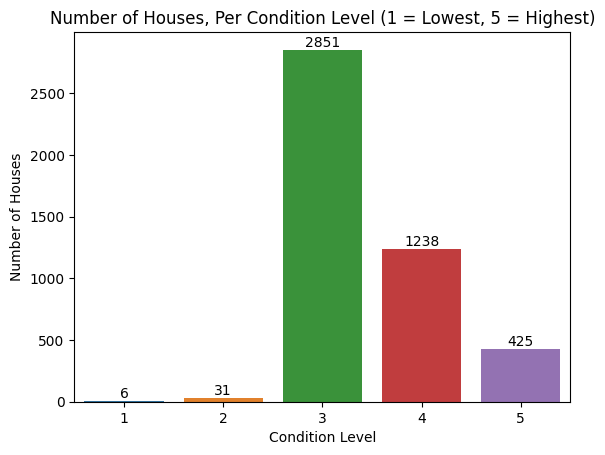

In [10]:
# univariate analysis example
uniVarCompare = sns.countplot(data=df,x='condition')
uniVarCompare.bar_label(uniVarCompare.containers[0],label_type='edge') # add values to top of each bar
plt.title('Number of Houses, Per Condition Level (1 = Lowest, 5 = Highest)')
plt.xlabel('Condition Level')
plt.ylabel('Number of Houses')
plt.show()

In [11]:
# most houses fall under the 3 & 4 categories (average -> above average)

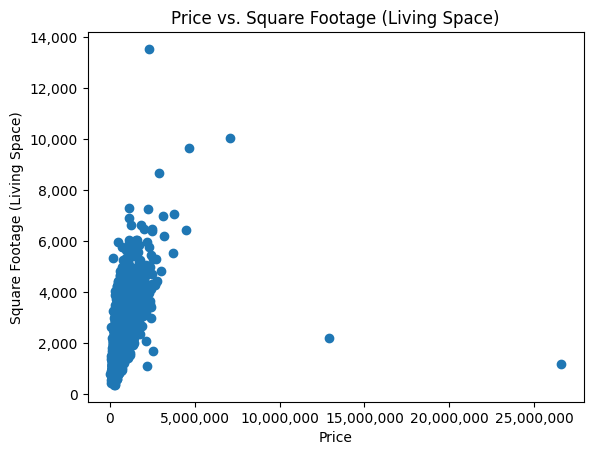

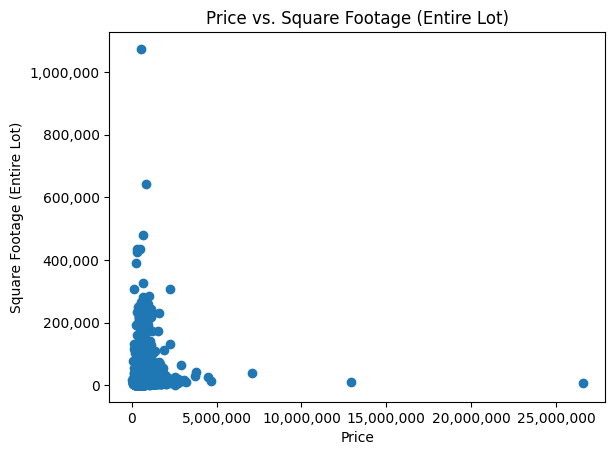

In [12]:
# bivariate analysis example
scatOne = plt.figure().add_subplot()
scatTwo = plt.figure().add_subplot()

# create scatter plots
scatOne.scatter(data=df,x='price',y='sqft_living')
scatTwo.scatter(data=df,x='price',y='sqft_lot')

# set titles/labels
scatOne.set_title('Price vs. Square Footage (Living Space)')
scatOne.set_xlabel('Price')
scatOne.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
scatOne.set_ylabel('Square Footage (Living Space)')
scatOne.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

scatTwo.set_title('Price vs. Square Footage (Entire Lot)')
scatTwo.set_xlabel('Price')
scatTwo.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
scatTwo.set_ylabel('Square Footage (Entire Lot)')
scatTwo.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [13]:
# while the relationship is positive between the variables, the correlation is lower than expected 

<AxesSubplot:>

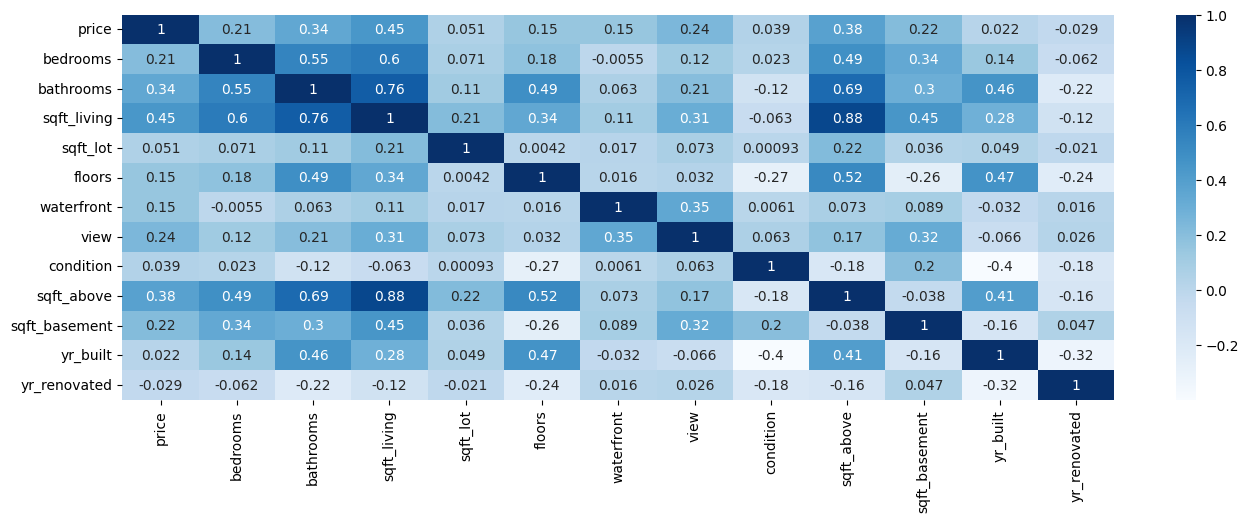

In [14]:
# multivariate analysis example
# expand default figure size
plt.figure(figsize=(16,5))
# heatmap
sns.heatmap(df.corr(),annot=True, cmap='Blues') #annot=True to show correlation values

In [15]:
# strong correlations: sqft_living & sqft_above, sqft_living & bathrooms, sqft_above & bathrooms